### Data Load

In [1]:
import numpy as np
import pandas as pd
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
app_train.shape, app_test.shape # test set에 target 값이 빠지니 하나 더 적음

((307511, 122), (48744, 121))

### Target 분포 및 AMT_INCOME_TOTAL 값 히스토그램

In [5]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot: >

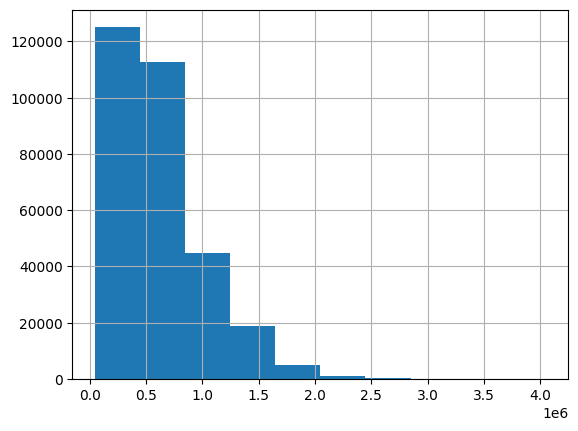

In [6]:
app_train['AMT_CREDIT'].hist()

(array([3.07508e+05, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.56500000e+04, 1.17230850e+07, 2.34205200e+07, 3.51179550e+07,
        4.68153900e+07, 5.85128250e+07, 7.02102600e+07, 8.19076950e+07,
        9.36051300e+07, 1.05302565e+08, 1.17000000e+08]),
 <BarContainer object of 10 artists>)

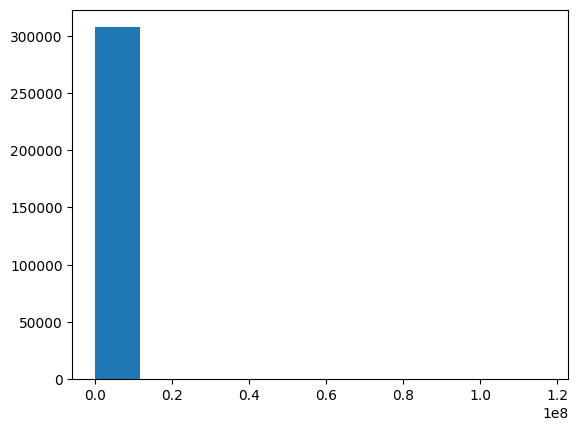

In [7]:
plt.hist(app_train['AMT_INCOME_TOTAL'])

C:\Users\miming\AppData\Local\Temp\ipykernel_18916\2469901244.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(app_train['AMT_INCOME_TOTAL'])


<AxesSubplot: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

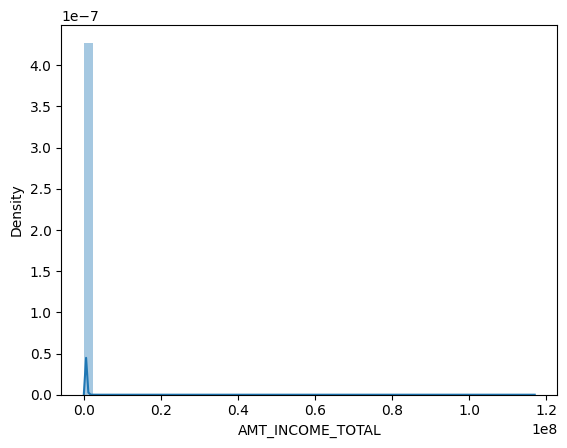

In [8]:
sns.distplot(app_train['AMT_INCOME_TOTAL'])
# 엄청 skew된 형태

<AxesSubplot: >

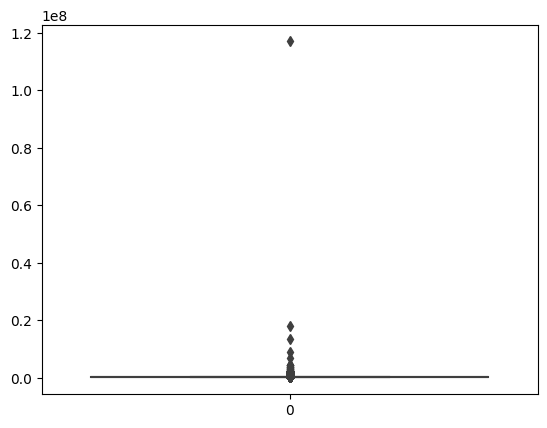

In [9]:
sns.boxplot(app_train['AMT_INCOME_TOTAL'])

C:\Users\miming\AppData\Local\Temp\ipykernel_18916\2934457664.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(app_train[condition]['AMT_INCOME_TOTAL'])


<AxesSubplot: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

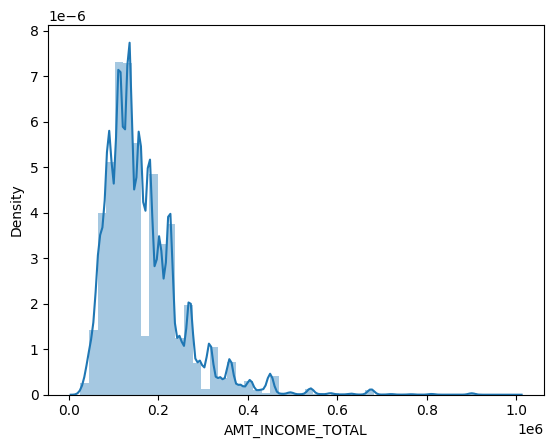

In [10]:
# 1,000,000 이하의 INCOME만 histogram
condition = app_train['AMT_INCOME_TOTAL'] < 1000000
sns.distplot(app_train[condition]['AMT_INCOME_TOTAL'])

### Target 값에 따른 AMT_INCOME_TOTAL 값 분포도 비교
- distplot, violinplot을 통한 시각화
- plt.subplots() 기반으로 seaborn의 distplot과 violinplot으로 분포도 비교 시각화

C:\Users\miming\AppData\Local\Temp\ipykernel_18916\1532339724.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label=0, color='blue')
C:\Users\miming\AppData\Local\Temp\ipykernel_18916\1532339724.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

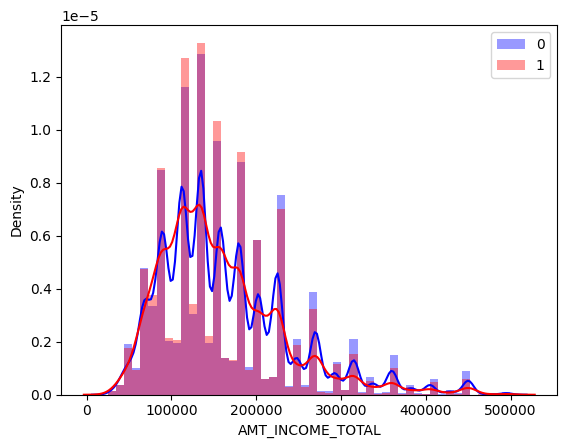

In [11]:
# Target 값에 따른 filtering 조건 설정
cond0 = app_train['TARGET'] == 0
cond1 = app_train['TARGET'] == 1

cond_amt = app_train['AMT_INCOME_TOTAL'] < 500000
# distplot으로 TARGET=1이면 빨간색, 0이면 푸른색으로 Histogram 표현
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label=0, color='blue')
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], label=1, color='red')
# legend 추가하기
plt.legend()
plt.show()

<AxesSubplot: xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

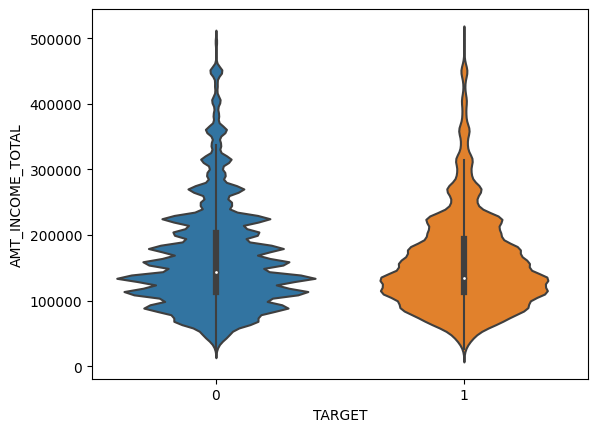

In [12]:
# violineplot을 이용하면 category 값 별로 연속형 값의 분포도 알수 있음
# x는 category컬럼, y는 연속형 컬럼
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt])


C:\Users\miming\AppData\Local\Temp\ipykernel_18916\2619613738.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], ax=axs[0][1], label=0, color='blue')
C:\Users\miming\AppData\Local\Temp\ipykernel_18916\2619613738.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

<AxesSubplot: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

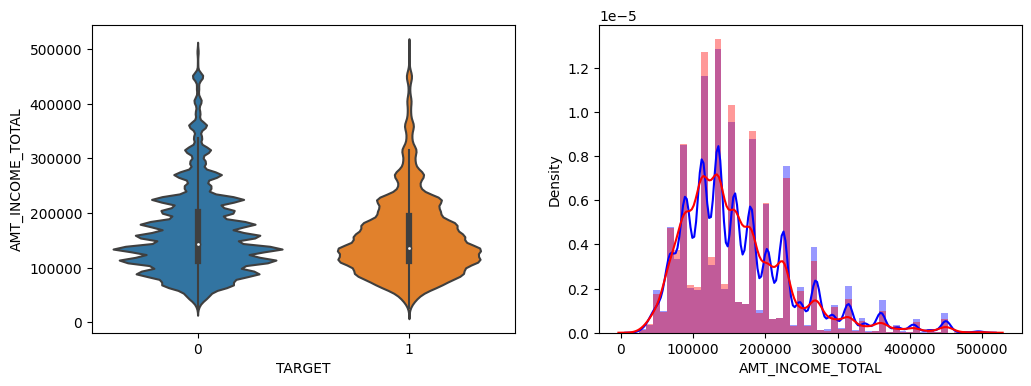

In [13]:
# TARGET 값 유형에 따른 Boolean Indexing 조건
cond1 = (app_train['TARGET'] == 1)
cond0 = (app_train['TARGET'] == 0)
cond_amt = (app_train['AMT_INCOME_TOTAL'] < 500000)

# 2개의 subplot 생성
# squeeze=False로 설정하면, 배열이 '압축'되지 않으며 명시적으로 지정된 행과 열의 수를 유지
fig, axs = plt.subplots(figsize=(12,4), nrows=1, ncols=2, squeeze=False)
# plot 왼쪽에 넣을거라는 소리
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt], ax=axs[0][0]) 
# Histogram을 오른쪽 subplot에 위치
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], ax=axs[0][1], label=0, color='blue')
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], ax=axs[0][1], label=1, color='red')


C:\Users\miming\AppData\Local\Temp\ipykernel_18916\3263343154.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[cond0 & cond_amt][column], ax=axs[0][1], label='0', color='blue')
C:\Users\miming\AppData\Local\Temp\ipykernel_18916\3263343154.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

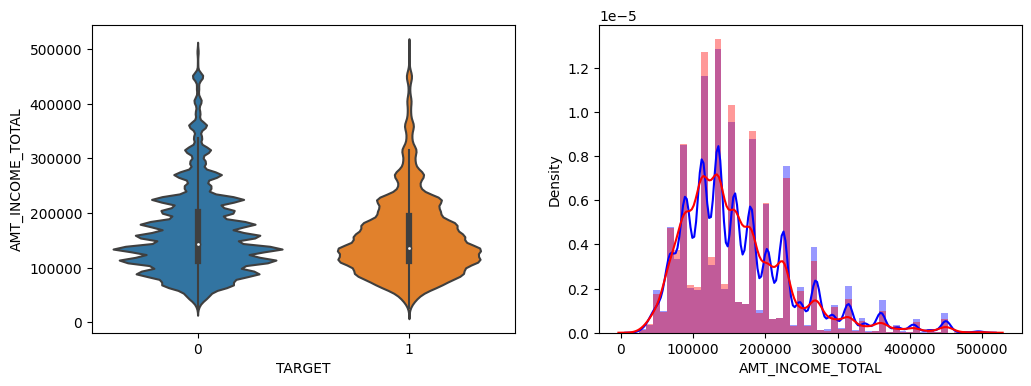

In [14]:
# 함수 생성
def show_column_hist_by_target(df, column, is_amt=False):    
    cond1 = (df['TARGET'] == 1)
    cond0 = (df['TARGET'] == 0)

    fig, axs = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)
    # is_amt가 True이면 < 500000 조건으로 filtering
    cond_amt = True
    if is_amt:
        cond_amt = df[column] < 500000
    
    sns.violinplot(x='TARGET', y=column, data=df[cond_amt], ax=axs[0][0] )
    sns.distplot(df[cond0 & cond_amt][column], ax=axs[0][1], label='0', color='blue')
    sns.distplot(df[cond1 & cond_amt][column], ax=axs[0][1], label='1', color='red')

show_column_hist_by_target(app_train, 'AMT_INCOME_TOTAL', is_amt=True)

### app_train과 app_test를 합쳐서 한번에 데이터 preprocessing 수행

In [15]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [16]:
# concat하기
app = pd.concat([app_train, app_test])
app.shape

(356255, 122)

In [17]:
# app_test의 TARGET 값은 Null로 입력됨 
# 합한 뒤 나눌때 Null 값이 있는 것으로 test set을 나누면 됨
app['TARGET'].value_counts(dropna=False)

0.0    282686
NaN     48744
1.0     24825
Name: TARGET, dtype: int64

### Object feature들을 Label Encoding
- pandas의 factorize()를 이용

In [18]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(40), object(16)
memory usage: 334.3+ MB


In [21]:
object_columns = app.dtypes[app.dtypes == 'object'].index.tolist()

In [23]:
# factor를 만드는 것과 동일 - factorize
pd.factorize(app['CODE_GENDER']) # ([0,1,0,0,1], ['M', 'F', 'XNA']) 우리는 첫번째만 필요
app['CODE_GENDER'] = pd.factorize(app['CODE_GENDER'])[0]

In [24]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(41), object(15)
memory usage: 334.3+ MB


In [25]:
# 모두 factorize할 것임. for 루프로
object_columns = app.dtypes[app.dtypes == 'object'].index.tolist()
for col in object_columns:
    app[col] = pd.factorize(app[col])[0]

In [26]:
app.info()
# object 타입이 모두 사라짐

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(56)
memory usage: 334.3 MB


In [27]:
# Null 값 일괄 변환
app.isnull().sum().head(100)

SK_ID_CURR                           0
TARGET                           48744
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         36
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     235241
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [28]:
app = app.fillna(-999)
app.isnull().sum().head(100)

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

### Train & Test dataset 분리하기

In [29]:
app_train = app[app['TARGET'] != -999]
app_test = app[app['TARGET'] == -999]
app_train.shape, app_test.shape 

((307511, 122), (48744, 122))

In [31]:
app_test = app_test.drop('TARGET', axis=1)
app_test.shape

(48744, 121)

In [32]:
ftr_app = app_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = app_train['TARGET']

In [34]:
from sklearn.model_selection import train_test_split
# x, x, y, y 임 잘 보고 나누기!
train_X, val_X, train_y, val_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=42)


In [35]:
train_X.shape, val_X.shape

((215257, 120), (92254, 120))

In [36]:
# lightgbm으로 학습하기
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
    n_jobs=-1,
    n_estimators=1000,
    learning_rate=0.02,
    num_leaves=32,
    subsample=0.8,
    max_depth=12,
    silent=-1,
    verbose=-1
)

clf.fit(train_X, train_y, eval_set=[(train_X, train_y), (val_X, val_y)],
        eval_metric='auc', verbose=100, early_stopping_rounds=50)

c:\Python310\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Python310\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	training's auc: 0.752242	training's binary_logloss: 0.250332	valid_1's auc: 0.74086	valid_1's binary_logloss: 0.251859
[200]	training's auc: 0.771785	training's binary_logloss: 0.243601	valid_1's auc: 0.751803	valid_1's binary_logloss: 0.247818
[300]	training's auc: 0.785388	training's binary_logloss: 0.239356	valid_1's auc: 0.756039	valid_1's binary_logloss: 0.246381
[400]	training's auc: 0.79663	training's binary_logloss: 0.235888	valid_1's auc: 0.757637	valid_1's binary_logloss: 0.245833
[500]	training's auc: 0.806253	training's binary_logloss: 0.232966	valid_1's auc: 0.758238	valid_1's binary_logloss: 0.245608
[600]	training's auc: 0.814887	training's binary_logloss: 0.230286	valid_1's auc: 0.758583	valid_1's binary_logloss: 0.245486
[700]	training's auc: 0.822822	training's binary_logloss: 0.227764	valid_1's auc: 0.758947	valid_1's binary_logloss: 0.245364
[800]	training's auc: 0.830554	training's binary_logloss: 0.225244	valid_1's auc: 0.759005	valid_1's binary_logloss: 0.2

LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

### Feature 시각화

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

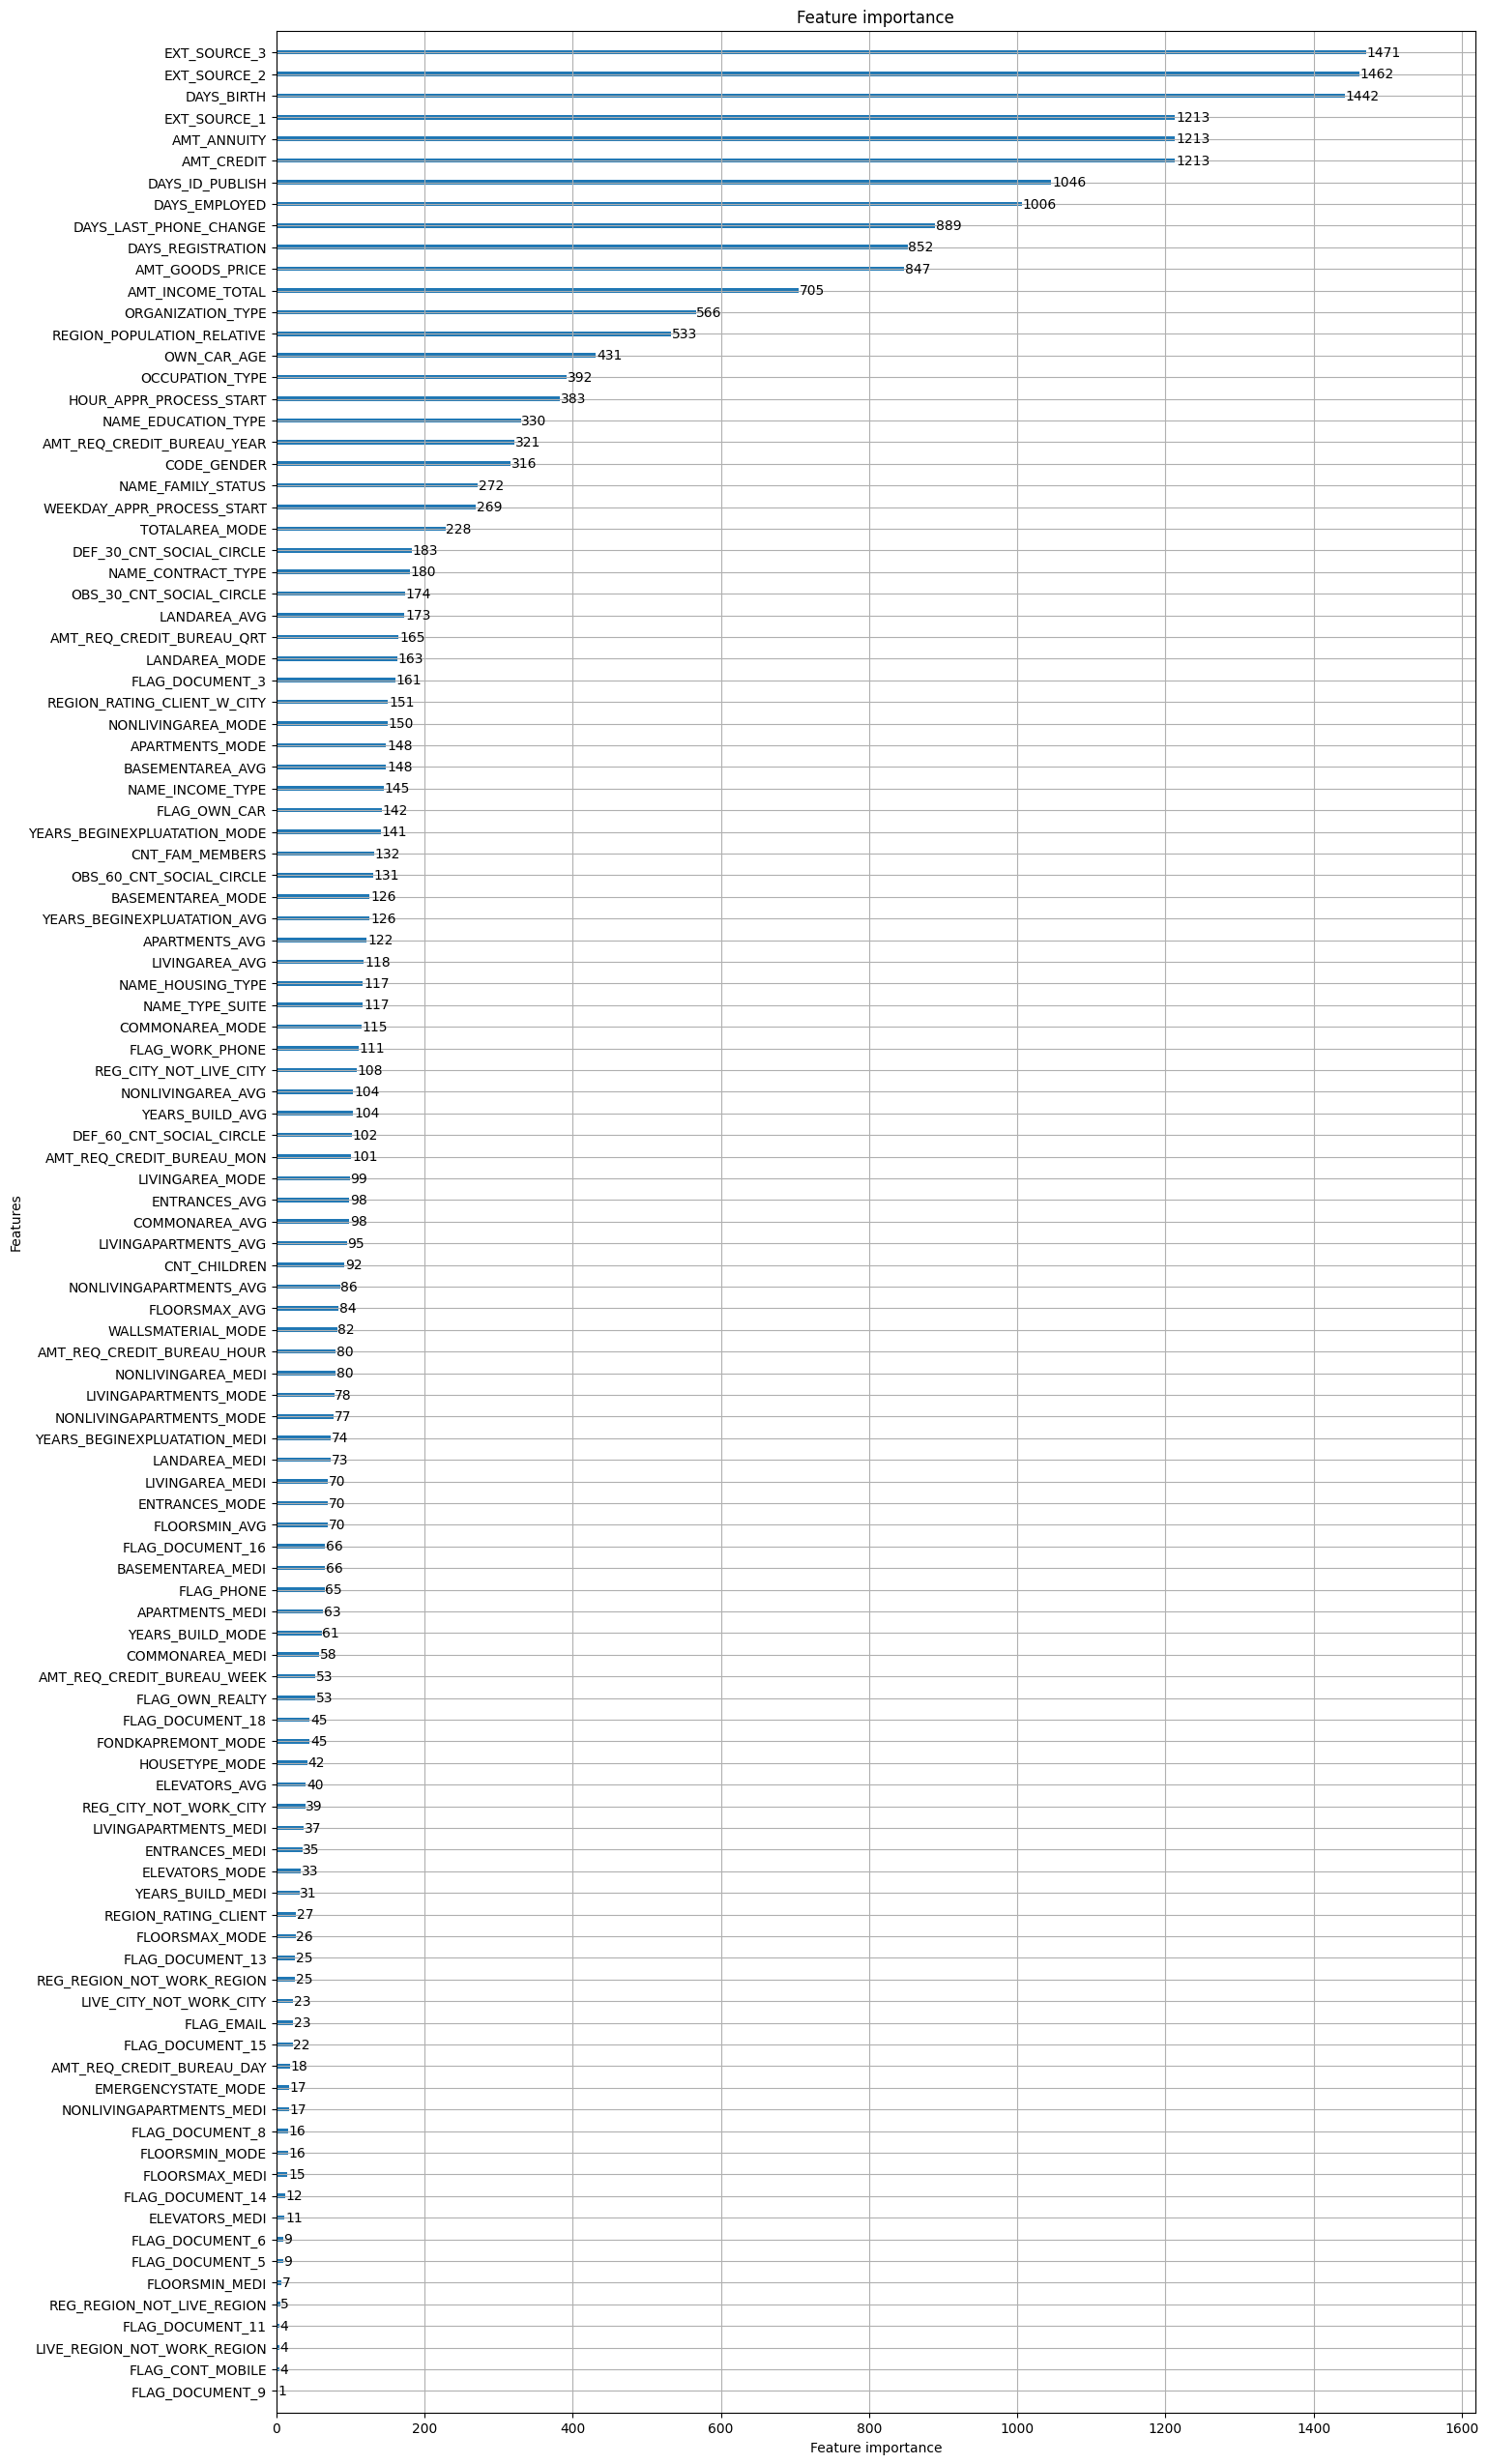

In [37]:
from lightgbm import plot_importance
plot_importance(clf, figsize=(16, 32))


### 학습된 classifier를 이용해 테스트 데이터를 예측하고 결과를 kaggle로 submit하기


In [38]:
#학습된 classifier의 predict_proba()를 이용하여 binary classification에서 1이될 확률만 추출
preds = clf.predict_proba(app_test.drop(['SK_ID_CURR'], axis=1))[:, 1]

# app_test의 TARGET으로 1이될 확률
app_test['TARGET'] = preds
app_test['TARGET'].head(10)

0    0.031963
1    0.114039
2    0.018700
3    0.038097
4    0.168749
5    0.041873
6    0.019515
7    0.052422
8    0.019503
9    0.069037
Name: TARGET, dtype: float64

In [39]:
# SK_ID_CURR과 TARGET 값만 csv 형태로 생성. 
app_test[['SK_ID_CURR', 'TARGET']].to_csv('app_baseline_01.csv', index=False)